In [4]:
import matplotlib.pyplot as plt
import numpy as np
# Import the specific scripts from the folder
from spikes_proxy_funcs import datasets, processing, rate_analysis

In [5]:
data = datasets.load_selected_data(num_datasets=5, num_neurons_per_dataset=2)

In [6]:
new_rate = 100 # Hz
upsampled_results = []

In [9]:
for ds_name, recordings in data.items():
    for i, rec in enumerate(recordings):
        times = rec['t']
        dff = rec['dff']
        spikes = rec['spikes']
        
        # Upsample using our new helper function
        u_sig, u_spk = processing.upsample(times, dff, spikes, new_rate=new_rate, do_plot=False)
        
        upsampled_results.append({
            'dataset': ds_name,
            'neuron_idx': i,
            'signal': u_sig,
            'spikes': u_spk
        })

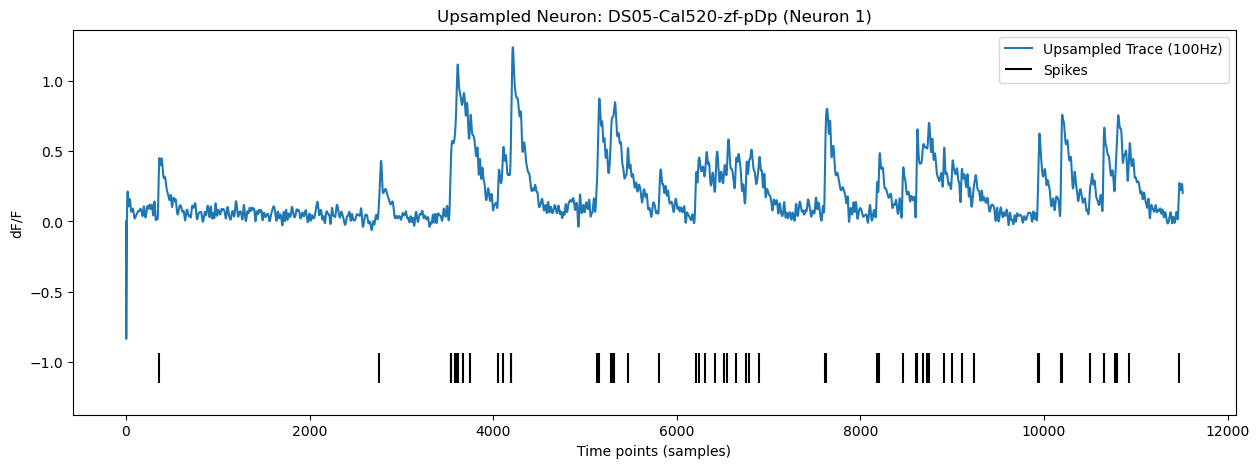

In [10]:
example = upsampled_results[9]
u_sig = example['signal']
u_spk = example['spikes']

plt.figure(figsize=(15, 5))
plt.plot(u_sig, label=f'Upsampled Trace ({new_rate}Hz)')
    
# Calculate global range to position spikes nicely below the signal
mx = np.max(u_sig)
mn = np.min(u_sig)
rng = mx - mn
    
# Plot spikes using eventplot
plt.eventplot(u_spk, lineoffsets=mn - rng*0.1, linelengths=rng*0.1, color='k', label='Spikes')
    
plt.title(f"Upsampled Neuron: {example['dataset']} (Neuron {example['neuron_idx']})")
plt.xlabel("Time points (samples)")
plt.ylabel("dF/F")
plt.legend()
plt.show()